# Recurrent Neural Network + LSTM
## Aanchal Sharma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, BatchNormalization

In [2]:
# Generating sample dataset

In [3]:
N=1000
Tp=800

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df=pd.DataFrame(x)
df.head()

,0
0,0.470099
1,1.215410
2,1.895876
3,1.974278
4,1.068464


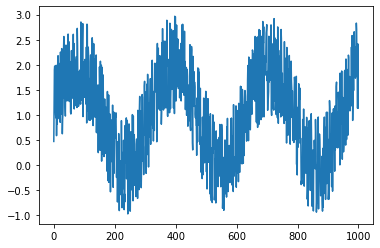

In [4]:
# how it looks in plot

plt.plot(df)
plt.show()

In [5]:
# split 'df' dataset into a training and test parts

In [6]:
values=df.values
train,test=values[0:Tp,:], values[Tp:N,:]

In [7]:
# Preparing the data (reshaping)

In [8]:
step=4
# add step elements into train and test
train=np.append (train,np.repeat(train[-1,],step))

test=np.append(test,np.repeat(test[-1,],step))

In [9]:
test

array([ 9.39149941e-01,  3.52669196e-01,  7.32529799e-01,  7.78756664e-01,
        1.62031779e+00,  5.43547864e-01,  1.43382391e+00,  1.30821767e+00,
        1.53291640e+00,  4.33557525e-01,  5.35650444e-01,  3.90881364e-01,
       -3.90310322e-01, -3.14914122e-01, -3.27502926e-01, -3.69294690e-01,
       -8.36634870e-02,  9.08940277e-01,  1.32475292e-01,  3.18720608e-01,
        1.11663714e+00,  3.92848322e-01, -4.20736319e-01,  3.75228361e-01,
        7.64588619e-01,  4.10883849e-01,  2.45878348e-01, -1.61744035e-01,
        6.44688105e-01,  3.86814000e-01,  9.50600437e-01,  5.16805991e-01,
       -6.81476951e-01, -4.73180313e-01,  7.44674762e-01, -8.16559865e-01,
        3.80376812e-01,  4.78393717e-01,  8.81300048e-01,  7.01803229e-01,
        5.95202925e-01,  3.47534899e-01, -5.06578615e-01,  9.05872200e-01,
       -4.73950053e-01,  1.02308330e+00,  5.21194524e-01, -8.19067447e-01,
       -3.03378977e-01, -6.17546807e-01, -7.41214117e-01,  3.00949007e-01,
       -9.15674314e-01,  

In [10]:
# convert test and train data into the matrix with step value

In [11]:
def convertToMatrix(data,step):
    x,y=[], []
    for i in range(len(data)-step):
        d=i+step
        x.append(data[i:d,])
        y.append(data[d,])
    return np.array(x),np.array(y)

In [12]:
trainx,trainy=convertToMatrix(train,step)
testx,testy=convertToMatrix(test,step)
trainx.shape

(800, 4)

In [13]:
trainy.shape

(800,)

In [14]:
trainx.shape

(800, 4)

In [15]:
# reshape trainx and testx to fit 

In [16]:
trainx=np.reshape(trainx,(trainx.shape[0],1,trainx.shape[1]))
testx=np.reshape(testx,(testx.shape[0],1,testx.shape[1]))
testx.shape

(200, 1, 4)

In [17]:
# Building a model with SimpleRNN

In [18]:
# simpleRNN
model=Sequential()
model.add(SimpleRNN(units=32,input_shape=(1,step),activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1))

In [19]:
# compile the model

model.compile(loss='mean_squared_error',optimizer='rmsprop')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [21]:
# predicting and plotting the result

In [22]:
# fit model with trainx data and predict testx data
model.fit(trainx,trainy,epochs=100,batch_size=16,verbose=2)

Epoch 1/100
50/50 - 2s - loss: 0.4208 - 2s/epoch - 46ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4073 - 73ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 0.4075 - 54ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.4061 - 57ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.4040 - 55ms/epoch - 1ms/step
Epoch 6/100
50/50 - 0s - loss: 0.4023 - 54ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.4019 - 58ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.4031 - 55ms/epoch - 1ms/step
Epoch 9/100
50/50 - 0s - loss: 0.3984 - 53ms/epoch - 1ms/step
Epoch 10/100
50/50 - 0s - loss: 0.3989 - 59ms/epoch - 1ms/step
Epoch 11/100
50/50 - 0s - loss: 0.3986 - 54ms/epoch - 1ms/step
Epoch 12/100
50/50 - 0s - loss: 0.3988 - 55ms/epoch - 1ms/step
Epoch 13/100
50/50 - 0s - loss: 0.4002 - 54ms/epoch - 1ms/step
Epoch 14/100
50/50 - 0s - loss: 0.3972 - 54ms/epoch - 1ms/step
Epoch 15/100
50/50 - 0s - loss: 0.3971 - 57ms/epoch - 1ms/step
Epoch 16/100
50/50 - 0s - loss: 0.3991 - 55ms/epoch - 1ms/step
Ep

In [23]:
# predict the model
trainPredict = model.predict(trainx)

25/25 [==============================] - 0s 912us/step


In [24]:
testPredict= model.predict(testx)

7/7 [==============================] - 0s 3ms/step


In [28]:
from keras.layers import LSTM

In [29]:
model2=Sequential()
model2.add(LSTM(10,activation='tanh'))
model2.add(Dense(1,activation='tanh'))

In [30]:
model2.compile(optimizer='adam',loss='mse')

In [31]:
model2.fit(trainx,trainy,epochs=100,batch_size=16,verbose=2)

Epoch 1/100
50/50 - 2s - loss: 1.6271 - 2s/epoch - 46ms/step
Epoch 2/100
50/50 - 0s - loss: 1.0610 - 72ms/epoch - 1ms/step
Epoch 3/100
50/50 - 0s - loss: 0.8320 - 53ms/epoch - 1ms/step
Epoch 4/100
50/50 - 0s - loss: 0.7431 - 67ms/epoch - 1ms/step
Epoch 5/100
50/50 - 0s - loss: 0.7039 - 76ms/epoch - 2ms/step
Epoch 6/100
50/50 - 0s - loss: 0.6842 - 56ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.6728 - 67ms/epoch - 1ms/step
Epoch 8/100
50/50 - 0s - loss: 0.6656 - 67ms/epoch - 1ms/step
Epoch 9/100
50/50 - 0s - loss: 0.6607 - 67ms/epoch - 1ms/step
Epoch 10/100
50/50 - 0s - loss: 0.6570 - 78ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 0.6539 - 67ms/epoch - 1ms/step
Epoch 12/100
50/50 - 0s - loss: 0.6515 - 53ms/epoch - 1ms/step
Epoch 13/100
50/50 - 0s - loss: 0.6493 - 77ms/epoch - 2ms/step
Epoch 14/100
50/50 - 0s - loss: 0.6475 - 55ms/epoch - 1ms/step
Epoch 15/100
50/50 - 0s - loss: 0.6458 - 67ms/epoch - 1ms/step
Epoch 16/100
50/50 - 0s - loss: 0.6444 - 78ms/epoch - 2ms/step
Ep

In [41]:
y_pred=model2.predict(testx)
import seaborn as sns

7/7 [==============================] - 0s 1ms/step


<AxesSubplot:>

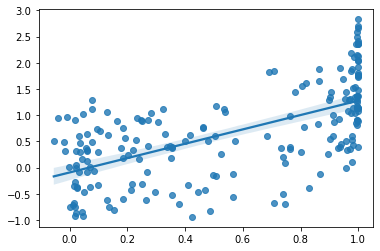

In [43]:
sns.regplot(y_pred,testy)

In [44]:
acc=accuracy_score(y_pred,testy)

ValueError: continuous is not supported